In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("medical_insurance.csv")


In [3]:
features = df[['age', 'bmi', 'children', 'charges']]

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

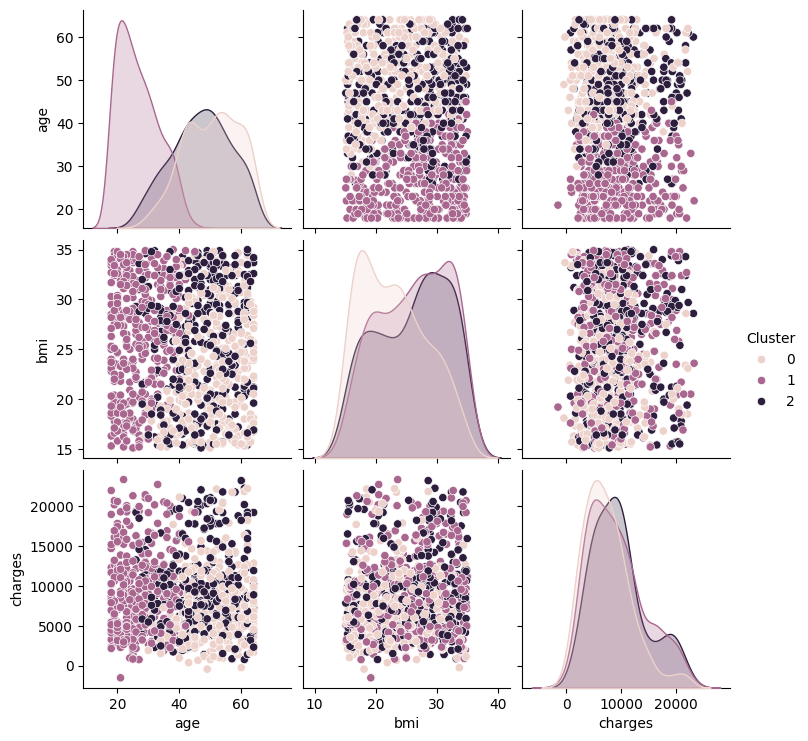

In [6]:
sns.pairplot(df, hue='Cluster', vars=['age', 'bmi', 'charges'])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv("medical_insurance.csv")

# Encode categorical variables
# 'region' -> OneHotEncoding, 'smoker' -> LabelEncoding
categorical_features = ['region']
label_feature = 'smoker'

# Apply one-hot encoding for 'region'
ohe = OneHotEncoder()
region_encoded = ohe.fit_transform(df[categorical_features]).toarray()

# Label encoding for 'smoker'
le = LabelEncoder()
df['smoker_encoded'] = le.fit_transform(df[label_feature])

# Combine the one-hot encoded columns back to the DataFrame
region_encoded_df = pd.DataFrame(region_encoded, columns=ohe.get_feature_names_out(categorical_features))
df = pd.concat([df, region_encoded_df], axis=1)

# Features and target variable
X = df[['age', 'bmi', 'children', 'smoker_encoded'] + list(region_encoded_df.columns)]
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 21367769.18582412
R-squared Score: -0.04820831546203186
